Doğrusal Regresyon(Linear Regression)


- amaç bağımlı ve bağımsız değişkenler arasındaki ilişkiyi doğrusal olarak modellemektir.
- Gerçek değerler ile tahmin edilen değerler arasında ki farkların karelerinin toplamını/ortalamasını minimum yapabilicek b(sabit) ve w değerlerini buluruz.



Başarı Değerlendirme 

- MSE ,RMSE  ve MEA değerlindirmeli kontrol edilir.
- MSE (hata kareler ortalamasında kare olmasının temel nedeni tahmin edilen hataların pozifit ya da negatif olması durumunda kaynaklanır.karesinin alınması ile bu durum ortadan kaldırmış olur.)


Parametrelerin Tahmin Edilmesi 

- Cost(b,w) = MSE ile özdeşleşir.
- Analitik Çözüm : Normal Denklemler Yöntemi (en küçük kareler yöntemi)
- Optimizasyon çözümü : Gradient Descent
- 

Gradient Descent

- Bir optimizasyon yöntemidir.
- Bir fonksiyonu minimum yapıcak parametleri bulmak için kullanılır.
- Gradyanın negatifi olarak tanımlanan 'en dik iniş' yönünde iteratif olarak parametre değerini güncelleyerek ilgili 
fonksiyonun minimum değerini verebilicek parametreleri bulur.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.float_format',lambda x: '%.2f' %x)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [9]:
df = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/datasets/advertising.csv")

In [10]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [12]:
df.shape

(200, 4)

In [14]:
X = df[["TV"]]
y = df[["sales"]]

In [15]:
reg_model = LinearRegression().fit(X,y)

In [17]:
reg_model.intercept_[0]
#sabit

7.032593549127695

In [18]:
reg_model.coef_[0][0]
#katsayı

0.04753664043301975

In [19]:
#150 birimlik TV harcaması olur ise ne kadar satış olması beklenir
reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

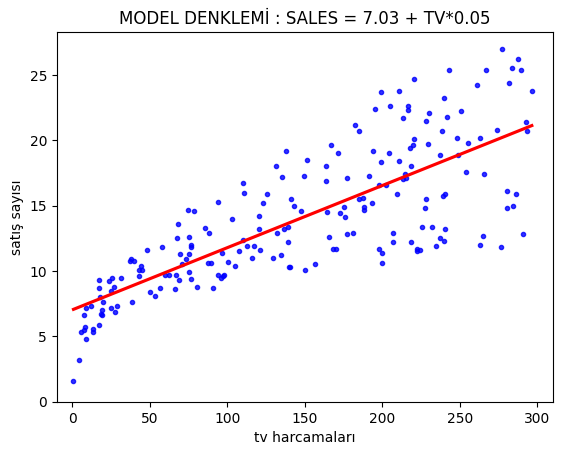

In [21]:
g = sns.regplot(x=X,y=y,scatter_kws={'color':'b','s':9},ci=False,color="r")
g.set_title(f"MODEL DENKLEMİ : SALES = {round(reg_model.intercept_[0],2)} + TV*{round(reg_model.coef_[0][0],2)}")
g.set_ylabel("satış sayısı")
g.set_xlabel("tv harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0)
plt.show()

In [22]:
y_pred =reg_model.predict(X)
mean_squared_error(y,y_pred)

10.512652915656757

In [23]:
y.mean()

sales   14.02
dtype: float64

In [24]:
y.std()

sales   5.22
dtype: float64

In [25]:
np.sqrt(mean_squared_error(y,y_pred))

3.2423221486546887

In [26]:
mean_absolute_error(y,y_pred)

2.549806038927486

In [28]:
reg_model.score(X,y)
#bağımsız değişkenlerin bağlımlı değişkenleri açıklama yüzdesidir.

0.611875050850071

Çoklu doğrusal regresyon modeli kurma


In [29]:
X = df.drop('sales',axis=1)

In [30]:
y = df[["sales"]]

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [34]:
y_test.shape

(40, 1)

In [35]:
X_test.shape


(40, 3)

In [36]:
reg_model = LinearRegression()

In [37]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [38]:
reg_model.intercept_

array([2.90794702])

In [39]:
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [40]:
#tahmin işlemleri

In [43]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T
#Örnek elle girilen tahmin

In [44]:
reg_model.predict(yeni_veri)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

In [45]:
#train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

1.7369025901470923

In [47]:
reg_model.score(X_train,y_train)
#tahmin başarısı

0.8959372632325174

In [49]:
#Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.411341755858159

In [50]:
reg_model.score(X_test,y_test)

0.8927605914615384

In [51]:
#10 katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,X,y,cv=10,scoring="neg_mean_squared_error")))

1.6913531708051792

In [52]:
#5 katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,X,y,cv=5,scoring="neg_mean_squared_error")))

1.717524727873208

Gradient Descent ile Doğrusal Regreesyon

In [71]:
# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse

In [72]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w


In [73]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [74]:
df = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/datasets/advertising.csv")

In [75]:
#örnek
X = df["radio"]
Y = df["sales"]

In [76]:
#örnek
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

In [77]:
#örnek
cost_history,b,w =  train(Y,initial_b,initial_w,X,learning_rate,num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25